# Questions
1. What is the goal?
  - Sales forecasting (Regression)
2. Data preparing process?
  - Understand data from plotting/visualization
  - Feature encoding - label encode/One hot encoder
  - Data type conversion
  - [Handle missing data](https://www.datacamp.com/tutorial/feature-engineering)
  - Scaling numericals
3. Which model to choose?
  - Linear regression
  - XG Boost 
  - Random Forest
4. How to improve model performance?
  - fine tuning hyperparameters with [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
  - Try diff models
  - [Cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html)




# Import library

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns  # data visualization library(histogram, boxplots, countplots)

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique

# Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and Understand Data

In [46]:
df=pd.read_csv('./Black_data.csv')
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [47]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [48]:
df.shape

(550068, 12)

In [49]:
df.describe()


,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [50]:
# Drop user_id and product_id
df.drop(['User_ID','Product_ID'],axis=1,inplace=True)


In [51]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  object 
 1   Age                         550068 non-null  object 
 2   Occupation                  550068 non-null  int64  
 3   City_Category               550068 non-null  object 
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          376430 non-null  float64
 8   Product_Category_3          166821 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 42.0+ MB


In [52]:
df.columns


Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [53]:
df['Age'].unique()


array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [54]:
for col in df.columns:
    print(col,df[col].unique())
    print('-'*80)


Gender ['F' 'M']
--------------------------------------------------------------------------------
Age ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
--------------------------------------------------------------------------------
Occupation [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
--------------------------------------------------------------------------------
City_Category ['A' 'C' 'B']
--------------------------------------------------------------------------------
Stay_In_Current_City_Years ['2' '4+' '3' '1' '0']
--------------------------------------------------------------------------------
Marital_Status [0 1]
--------------------------------------------------------------------------------
Product_Category_1 [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
--------------------------------------------------------------------------------
Product_Category_2 [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
--------

In [55]:
# Convert Gender -> Binary
df['Gender']=df['Gender'].map({'M':0, 'F':1})
df.head()


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,A,2,0,3,NaN,NaN,8370
1,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,1,0-17,10,A,2,0,12,NaN,NaN,1422
3,1,0-17,10,A,2,0,12,14.0,NaN,1057
4,0,55+,16,C,4+,0,8,NaN,NaN,7969


In [56]:
# Convert Age Bins -> Numbers
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1,10,A,2,0,3,NaN,NaN,8370
1,1,1,10,A,2,0,1,6.0,14.0,15200
2,1,1,10,A,2,0,12,NaN,NaN,1422
3,1,1,10,A,2,0,12,14.0,NaN,1057
4,0,7,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,0,6,13,B,1,1,20,NaN,NaN,368
550064,1,3,1,C,3,0,20,NaN,NaN,371
550065,1,3,15,B,4+,1,20,NaN,NaN,137
550066,1,7,1,C,2,0,20,NaN,NaN,365


In [57]:
# Convert Stay_In_Current_City_Years datatype Object -> Int
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') # replace 4+ years to 4
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)
df


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1,10,A,2,0,3,NaN,NaN,8370
1,1,1,10,A,2,0,1,6.0,14.0,15200
2,1,1,10,A,2,0,12,NaN,NaN,1422
3,1,1,10,A,2,0,12,14.0,NaN,1057
4,0,7,16,C,4,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...
550063,0,6,13,B,1,1,20,NaN,NaN,368
550064,1,3,1,C,3,0,20,NaN,NaN,371
550065,1,3,15,B,4,1,20,NaN,NaN,137
550066,1,7,1,C,2,0,20,NaN,NaN,365


In [58]:
# One HOt Encode City_Category
# Pandas offers the get_dummies function to convert categorical variables into multiple binary columns.
city_ohe=pd.get_dummies(df['City_Category'],dtype=int,drop_first=True)
df=pd.concat([df,city_ohe],axis=1) # Join **horizontally** (add columns)
df.drop(['City_Category'],axis=1,inplace=True)
df


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,1,10,2,0,3,NaN,NaN,8370,0,0
1,1,1,10,2,0,1,6.0,14.0,15200,0,0
2,1,1,10,2,0,12,NaN,NaN,1422,0,0
3,1,1,10,2,0,12,14.0,NaN,1057,0,0
4,0,7,16,4,0,8,NaN,NaN,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...
550063,0,6,13,1,1,20,NaN,NaN,368,1,0
550064,1,3,1,3,0,20,NaN,NaN,371,0,1
550065,1,3,15,4,1,20,NaN,NaN,137,1,0
550066,1,7,1,2,0,20,NaN,NaN,365,0,1


In [59]:
# Check for missing data
df.isnull().sum()


Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [60]:
# Check to see more details: what values and how many in total
df['Product_Category_2'].value_counts()


Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [61]:
# Fill null with 0 - assume customer didn't purchase
df['Product_Category_2']=df['Product_Category_2'].fillna(0)
df['Product_Category_3']=df['Product_Category_3'].fillna(0)


In [62]:
df.isnull().sum()


Gender                        0
Age                           0
Occupation                    0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
B                             0
C                             0
dtype: int64

In [63]:
# Check cleaned data
df.head()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,1,10,2,0,3,0.0,0.0,8370,0,0
1,1,1,10,2,0,1,6.0,14.0,15200,0,0
2,1,1,10,2,0,12,0.0,0.0,1422,0,0
3,1,1,10,2,0,12,14.0,0.0,1057,0,0
4,0,7,16,4,0,8,0.0,0.0,7969,0,1


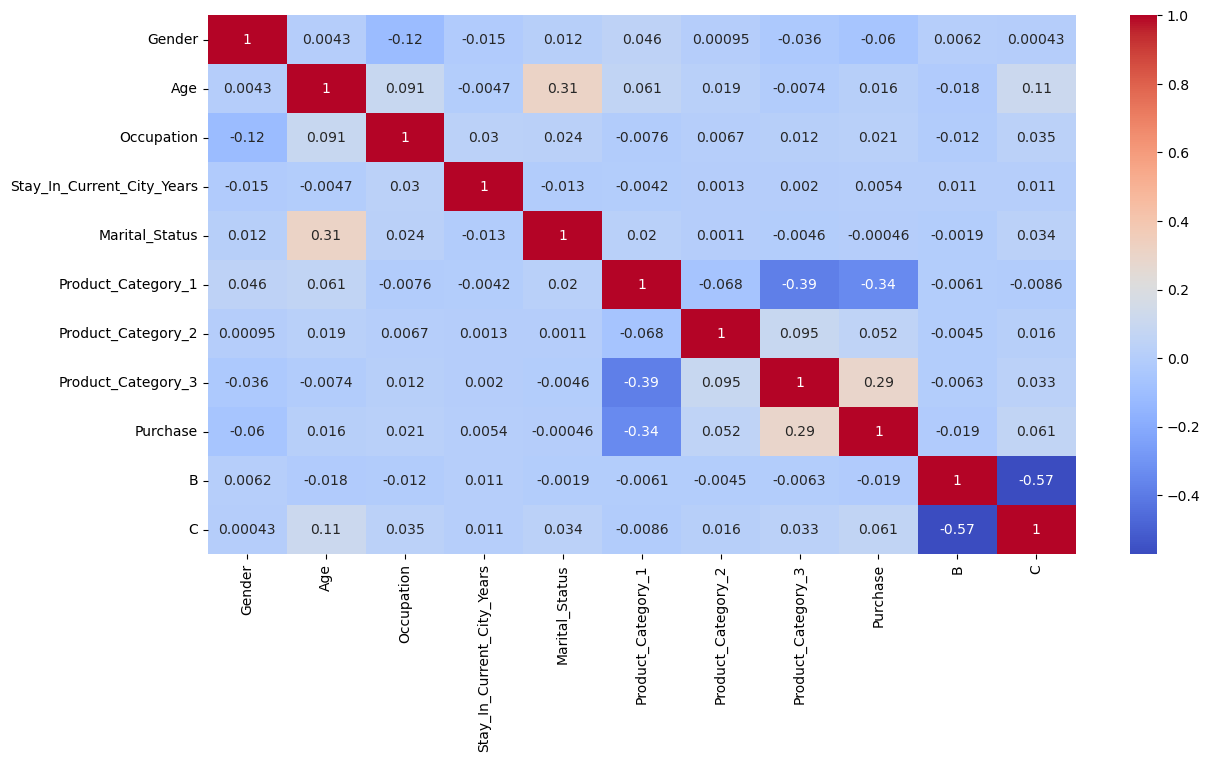

In [64]:
# check correlation matrix
corr=df.corr()
plt.figure(figsize=(14, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


In [65]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      550068 non-null  int64  
 1   Age                         550068 non-null  int64  
 2   Occupation                  550068 non-null  int64  
 3   Stay_In_Current_City_Years  550068 non-null  int64  
 4   Marital_Status              550068 non-null  int64  
 5   Product_Category_1          550068 non-null  int64  
 6   Product_Category_2          550068 non-null  float64
 7   Product_Category_3          550068 non-null  float64
 8   Purchase                    550068 non-null  int64  
 9   B                           550068 non-null  int64  
 10  C                           550068 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 46.2 MB


In [66]:
df.to_csv('black_friday_fe.csv', index=False)


## EDA

In [67]:
df=pd.read_csv('./black_friday_fe.csv')
df.head()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,1,10,2,0,3,0.0,0.0,8370,0,0
1,1,1,10,2,0,1,6.0,14.0,15200,0,0
2,1,1,10,2,0,12,0.0,0.0,1422,0,0
3,1,1,10,2,0,12,14.0,0.0,1057,0,0
4,0,7,16,4,0,8,0.0,0.0,7969,0,1


In [68]:
df.describe()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
count,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,0.246895,3.496430,8.076707,1.858418,0.409653,5.404270,6.735436,3.841941,9263.968713,0.420263,0.311189
std,0.431205,1.353632,6.522660,1.289443,0.491770,3.936211,6.215492,6.250712,5023.065394,0.493601,0.462980
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000
25%,0.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5823.000000,0.000000,0.000000
50%,0.000000,3.000000,7.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8047.000000,0.000000,0.000000
75%,0.000000,4.000000,14.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12054.000000,1.000000,1.000000
max,1.000000,7.000000,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,23961.000000,1.000000,1.000000


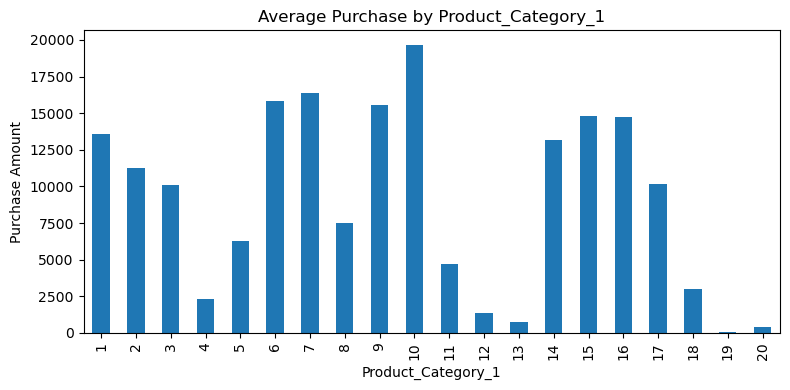

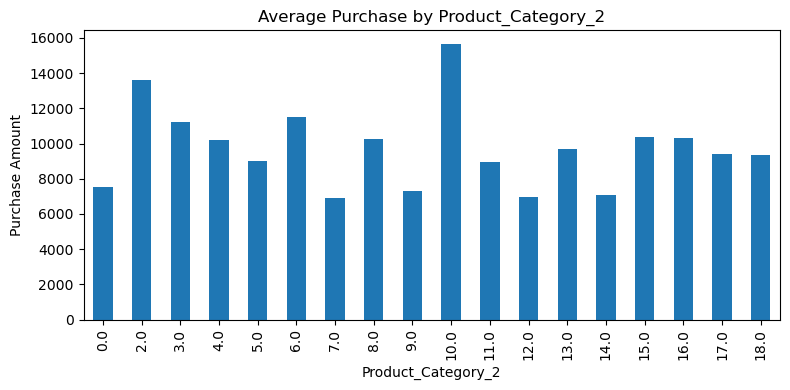

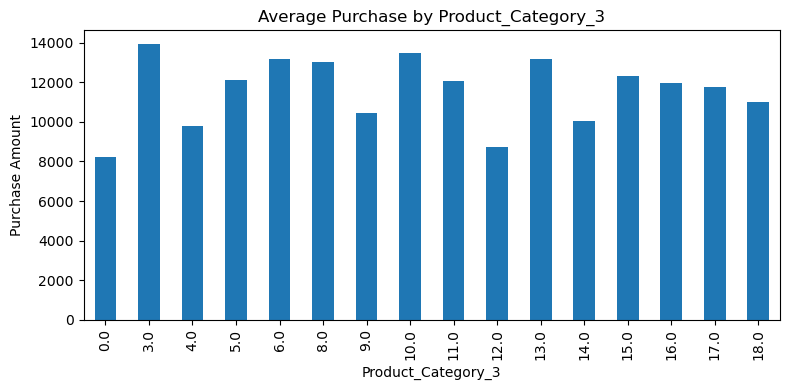

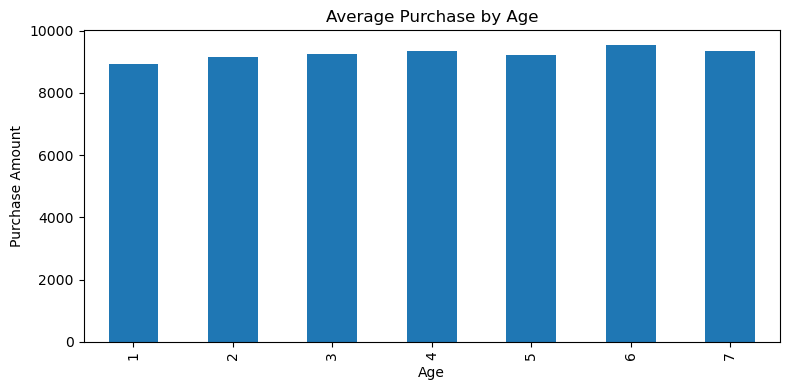

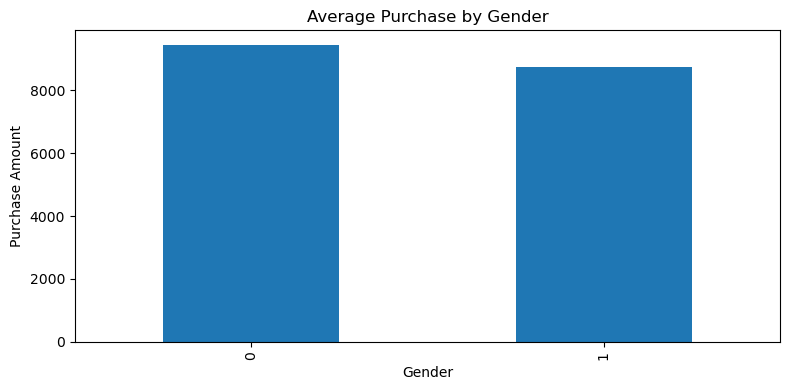

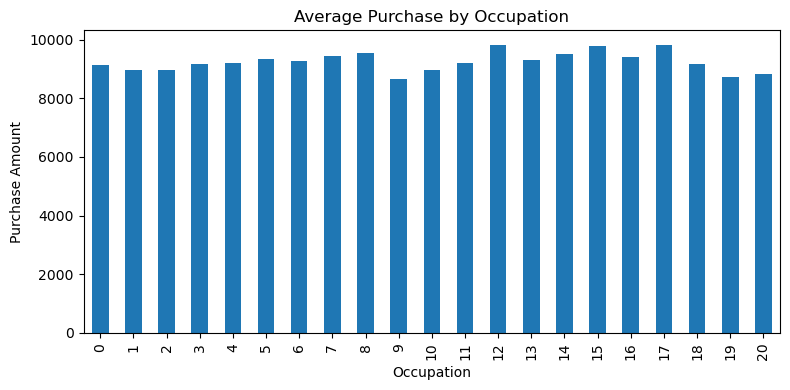

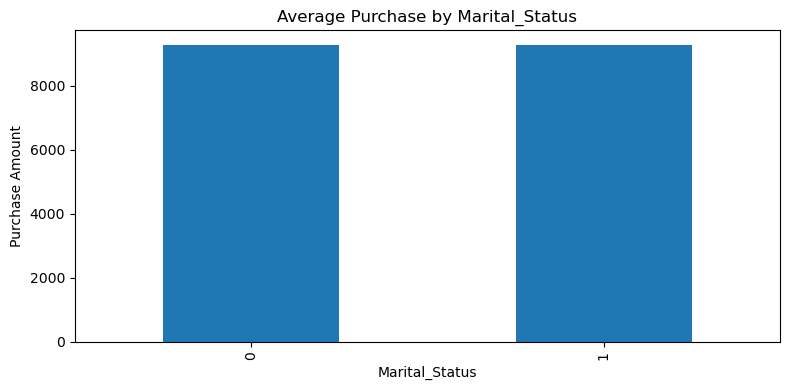

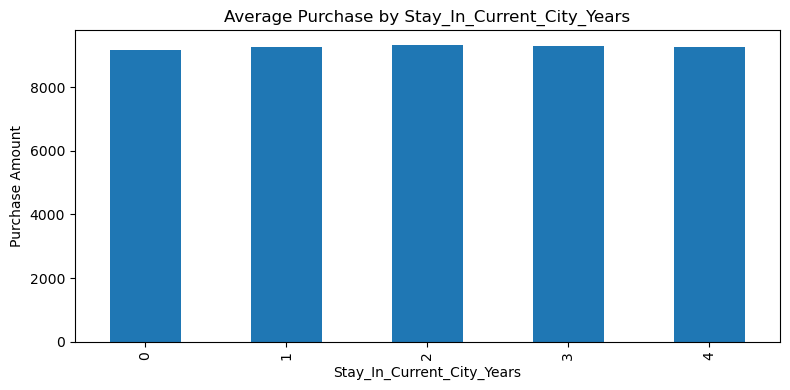

In [69]:
 # EDA: Average Purchase by each feature
columns_to_plot = [
      'Product_Category_1',
      'Product_Category_2',
      'Product_Category_3',
      'Age',
      'Gender',
      'Occupation',
      'Marital_Status',
      'Stay_In_Current_City_Years'
  ]

for col in columns_to_plot:
      plt.figure(figsize=(8, 4))
      df.groupby(col)['Purchase'].mean().plot(kind='bar')
      plt.title(f'Average Purchase by {col}')
      plt.ylabel('Purchase Amount')
      plt.xlabel(col)
      plt.tight_layout()
      plt.show()


# Split Data

In [70]:
df.head()


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,1,1,10,2,0,3,0.0,0.0,8370,0,0
1,1,1,10,2,0,1,6.0,14.0,15200,0,0
2,1,1,10,2,0,12,0.0,0.0,1422,0,0
3,1,1,10,2,0,12,14.0,0.0,1057,0,0
4,0,7,16,4,0,8,0.0,0.0,7969,0,1


## Separate features X and target y

In [71]:
X = df.drop(columns=['Purchase'])
y = df['Purchase']
X


,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,1,1,10,2,0,3,0.0,0.0,0,0
1,1,1,10,2,0,1,6.0,14.0,0,0
2,1,1,10,2,0,12,0.0,0.0,0,0
3,1,1,10,2,0,12,14.0,0.0,0,0
4,0,7,16,4,0,8,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...
550063,0,6,13,1,1,20,0.0,0.0,1,0
550064,1,3,1,3,0,20,0.0,0.0,0,1
550065,1,3,15,4,1,20,0.0,0.0,1,0
550066,1,7,1,2,0,20,0.0,0.0,0,1


## Create training and validation sets

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [73]:
y_train.value_counts()


Purchase
7166     158
7011     157
7027     153
7114     151
6976     150
        ... 
11310      1
10399      1
4888       1
9360       1
11341      1
Name: count, Length: 17659, dtype: int64

# Choose and Train a model

In [74]:
# dict of models with n_jobs=-1 (use all avail cpus) for parallelization (faster training)
# n_estimator=100: build 100 decision tress
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1),
    'XG Boost': XGBRegressor(n_estimators=100, random_state=42, n_jobs=-1)
}


In [80]:
# Cross-validation to compare models (using cv=3 for speed on large dataset)
# r2: A higher value (closer to 1) indicates a better fit
# rmse: standard deviation 
# mse: average diff between predicted and actual values
from sklearn.model_selection import cross_val_score

cv_results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    cv_results[model_name] = {
        'mean_r2': np.mean(scores),
        'std_r2': np.std(scores),
        'scores': scores
    }
    print(f'R2 Score: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})')
    print('-' * 50)

# Find best model
best_model_name = max(cv_results, key=lambda x: cv_results[x]['mean_r2'])
print(f"Best model: {best_model_name} with R2 = {cv_results[best_model_name]['mean_r2']:.4f}")


Training Linear Regression...
R2 Score: 0.1527 (+/- 0.0020)
--------------------------------------------------
Training Random Forest...
R2 Score: 0.6301 (+/- 0.0031)
--------------------------------------------------
Training XG Boost...
R2 Score: 0.6742 (+/- 0.0032)
--------------------------------------------------
Best model: XG Boost with R2 = 0.6742


In [97]:
# Train best model on full training data and evaluate on test set
best_model = models[best_model_name]
best_model.fit(X_train, y_train)

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluate
print(f"=== {best_model_name} Performance on Test Set ===")
print(f"R2 Score:  {r2_score(y_test, y_pred):.4f}")
print(f"RMSE:      {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"MAE:       {mean_absolute_error(y_test, y_pred):.2f}")


=== XG Boost Performance on Test Set ===
R2 Score:  0.6674
RMSE:      2891.05
MAE:       2157.65


# Understand RMSE vs MAE and improve the model


## Fine tune parameters

In [ ]:
# use GridSearch with many possible values of each hyperparameter to find the best combination
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],     # number of trees
}

grid = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_root_mean_squared_error')

In [85]:
best_nb_estimators = grid.best_params_["n_estimators"]
print(f"best parameter: {best_nb_estimators}, best score: {-grid.best_score_}")


best parameter: 400, best score: 2854.588818359375


In [89]:
param_grid = {
              'n_estimators': [best_nb_estimators], 
              'max_depth': [3, 5, 7],
              'learning_rate': [0.2, 0.3, 0.4], 
              'subsample': [0.8, 0.9, 1.0],        # Prevents overfitting 
             }

grid = GridSearchCV(estimator=XGBRegressor(), 
                    param_grid=param_grid, 
                    scoring='neg_root_mean_squared_error', 
                    cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [3, 5, 7], 'n_estimators': [400],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_root_mean_squared_error')

In [90]:
import pprint

final_params = grid.best_params_
pprint.pprint(final_params)

{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 400, 'subsample': 1.0}


In [91]:
print(-grid.best_score_)

2851.8314453125


In [96]:
final_xgb = XGBRegressor(**final_params)
final_xgb.fit(X_train, y_train)

y_train_pred = final_xgb.predict(X_train)
y_test_pred = final_xgb.predict(X_test)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"final train RMSE: {train_RMSE}\nfinal test RMSE: {test_RMSE}")

final train RMSE: 2724.92036580888
final test RMSE: 2864.3964460248862


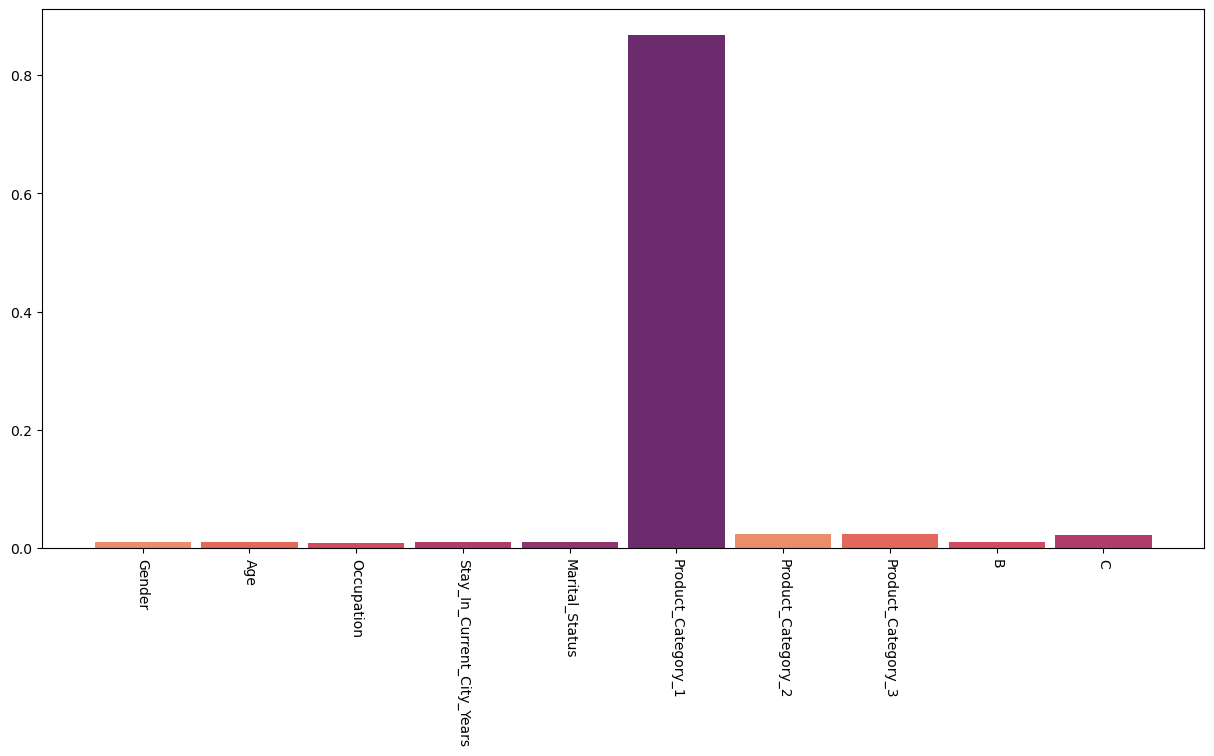

In [93]:
plt.figure(figsize=(15, 7), dpi=100)
palette = sns.color_palette("flare")
plt.bar(x=final_xgb.feature_names_in_, height=final_xgb.feature_importances_, width=0.9, color=palette)

plt.xticks(rotation=-90)
plt.show()

# Save the model

In [95]:
# Save the trained model
import joblib
joblib.dump(final_xgb, 'pred_black_friday_model.pkl')

print("Model saved!")

Model saved!
